In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def loss(x, y):
    J = (x-32)**2 - (y-12)**2
    return J

In [3]:
def grad(x, y):
    dx = 2*x - 64
    dy = 2*y - 24
    return dx, dy

In [41]:
def gradient_descent_with_momentum(learning_rate=0.1, beta=0.9, iterations=1000):
    vdx = 0
    vdy = 0
    x = random.gauss(0, 0.01)
    y = random.gauss(0, 0.01)
    cache = []
    for i in range(iterations):
        dx, dy = grad(x, y)
        vdx = beta * vdx + (1-beta) * dx
        vdy = beta * vdy + (1-beta) * dy
        x = x - learning_rate * vdx
        y = y - learning_rate * vdy
        J = loss(x, y)
        cache.append([x, y, J])
    return x, y, cache

In [45]:
x, y, cache = gradient_descent_with_momentum()
cache = np.array(cache)
cache.shape

(1000, 3)

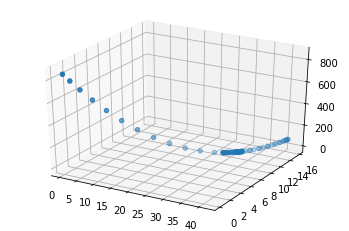

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=cache[:, 0], ys=cache[:, 1], zs=cache[:, 2])

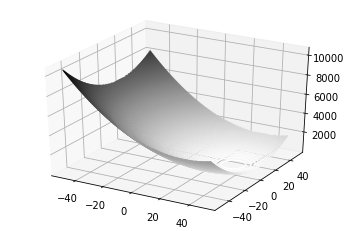

In [53]:
xline = np.linspace(-50, 50, 1000)
yline = np.linspace(-50, 50, 1000)
def f(x, y):
    return (x-32)**2 + (y-12)**2
X, Y = np.meshgrid(xline, yline)
zline = f(X, Y)
ax1 = plt.axes(projection='3d')
ax1.contour3D(X, Y, zline, 200, cmap='binary')